# Explore Relationships in Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load and Review Data

In [2]:
# Load the dataset into Pandas dataframe
happiness = pd.read_csv("../Resources/2019_global_happiness.csv")

# Load the dataset reference into a Pandas dataframe
happiness_ref = pd.read_csv("../Resources/2019_global_happiness_reference.csv")

# Review the first 5 rows
happiness.head(5)

,country,year,happiness,wealth,support,health,freedom,generosity,corruption,positivity,negativity
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919


In [3]:
# Review the dataset reference
happiness_ref.style.set_properties(subset=['Description'], **{'width': '350px'}, **{'text-align': 'left'})

,Variable,Description
0,country,Name of the country.
1,year,"Survey year, ranging from 2005-2018."
2,happiness,A happiness ranking on a scale of 0 to 10.
3,wealth,"Log GDP per capita, which indicates the wealth of the country."
4,support,A value that indicates how many people have family and friends that they can rely on.
5,health,Healthy life expectancy at birth.
6,freedom,Satisfaction with individual freedom to make life choices.
7,generosity,Measure of how likely people are to donate to charity.
8,corruption,Measure of national corruption
9,positivity,"Average of measures for happiness, laugh and enjoyment."


**After reviewing the dataset, what patterns and relationships are you interested in exploring? How might you use visualizations to gain insights on global happiness?**

* Correlation Analysis: Examine the correlation between happiness and other variables like wealth, health, freedom, etc. This can be visualized using a correlation heatmap.

* Trend Over Time: Analyze how happiness scores have changed over the years for different countries. Line graphs can illustrate these trends effectively.

* Regional Comparisons: Compare happiness levels across different regions or continents. Bar charts or geographic heat maps could be useful here.

* Factor Analysis: Investigate which factors (wealth, health, freedom, etc.) contribute most to happiness. A series of scatter plots could show the relationship between happiness and each factor.

* Outlier Analysis: Identify countries that are outliers in terms of happiness and related factors. Box plots can be used for this purpose.

* Cluster Analysis: Group countries based on similarities in their happiness scores and other factors, possibly using a clustering algorithm. The results can be visualized in a multi-dimensional scatter plot.

Answers will vary, but could include the following:

* How happiness varies by country
* How happiness varies by time
* If happiness tends to be higher in wealthier countries
* If countries with higher happiness levels are more likely to be generous

## Explore Happiness by Country with Bar Charts

In [4]:
# Group dataset by country, drop year column, and calculate average values
by_country = happiness.drop(columns=['year']).groupby('country').mean()

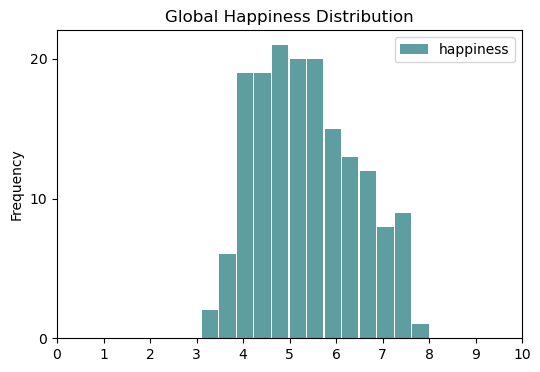

In [5]:
# Plot the distribution of happiness in the dataset
happiness_dist = by_country.plot.hist(column=['happiness'],bins=200,xlim=(0,10), width=0.35, figsize=(6,4),
                                         title='Global Happiness Distribution', xticks=range(0,11), 
                                         yticks=[0,10,20], color='cadetblue')

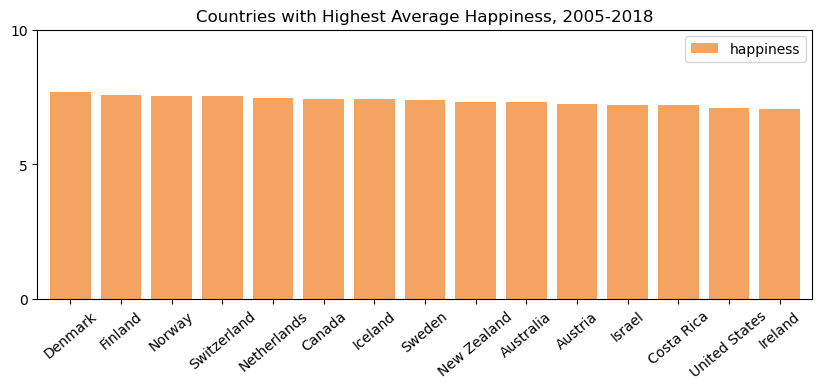

In [6]:
# Bar chart that shows happiness for the 10 happiest countries
top = by_country.sort_values(by=['happiness'], ascending=False).head(15)
top_chart = top.plot.bar(y='happiness', rot=40, width=0.8, figsize=(10,3.5),ylim=(0,10),
                         title='Countries with Highest Average Happiness, 2005-2018',
                         yticks=[0,5,10], xlabel='',color='sandybrown')

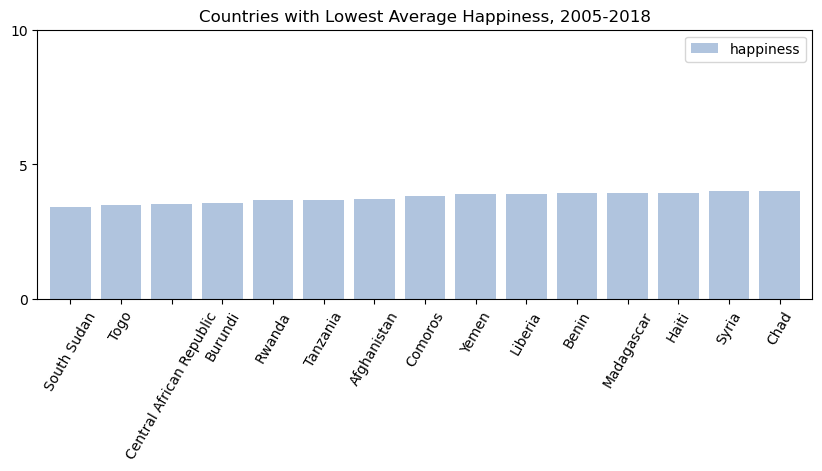

In [7]:
# Bar chart that shows happiness for the 10 least happy countries
bottom = by_country.sort_values(by=['happiness']).head(15)
bottom_chart = bottom.plot.bar(y='happiness', rot=60, width=0.8, figsize=(10,3.5),ylim=(0,10),
                         title='Countries with Lowest Average Happiness, 2005-2018',
                         yticks=[0,5,10], xlabel='',color='lightsteelblue')

**What do these charts tell you about global happiness?**

Maximum Happiness Rating: The highest average happiness rating for any country is close to 8 out of 10. This suggests that even the happiest countries have room for improvement in terms of overall well-being.

Central Tendency in Happiness Ratings: Most countries have happiness ratings that fall in the middle of the scale. This distribution indicates a general trend towards moderate levels of happiness worldwide, with fewer countries at the extreme ends of the scale.

Characteristics of the Happiest Countries: The 15 happiest countries, as indicated by the bar chart, are predominantly highly-developed nations in Europe and North America. This could imply a correlation between development (economic, social, and health factors) and higher happiness levels. Factors such as stable economies, effective governance, quality healthcare, and strong social support systems may contribute to this trend.

Characteristics of the Least Happy Countries: The countries with the lowest happiness ratings are mostly less developed. Many of these countries may have experienced significant challenges such as political conflicts, economic instability, or natural disasters. These factors can significantly impact the overall well-being and happiness of populations.

These charts and observations highlight the complex interplay between economic development, social structures, and overall well-being. They suggest that while economic wealth can be a significant factor in determining a country's average happiness, it's not the only one. Political stability, social support, and freedom, among other factors, play crucial roles in shaping the happiness of nations.

Answers will vary, but could include the following observations:

* The maximum average happiness rating for any country is around 8 on a scale from 0 to 10
* Most of the countries in the dataset have a happiness rating in the middle of the scale
* The 15 happiest countries are mostly highly-developed countries in Europe and North America
* The 15 least happy countries are mostly less-developed, and several of the countries have had major conflicts or natural disasters

## Explore Changes Over Time with Line Charts

In [8]:
# Group dataset by year, drop country column, and calculate average values
by_year = happiness.drop(columns=['country']).groupby('year').mean()

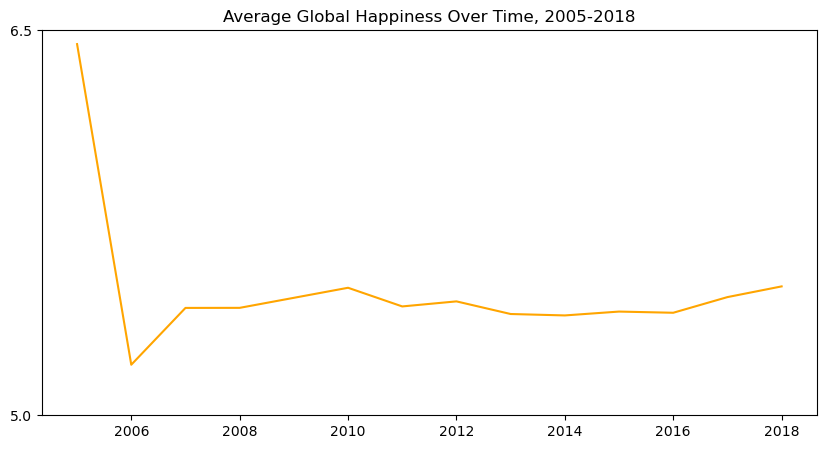

In [9]:
# Average global happiness over time
happiness_time_chart = by_year.happiness.plot(figsize=(10,5),ylim=(5,6.5),yticks=(5,6.5),
                                              title='Average Global Happiness Over Time, 2005-2018',
                                              xlabel='',color='orange')

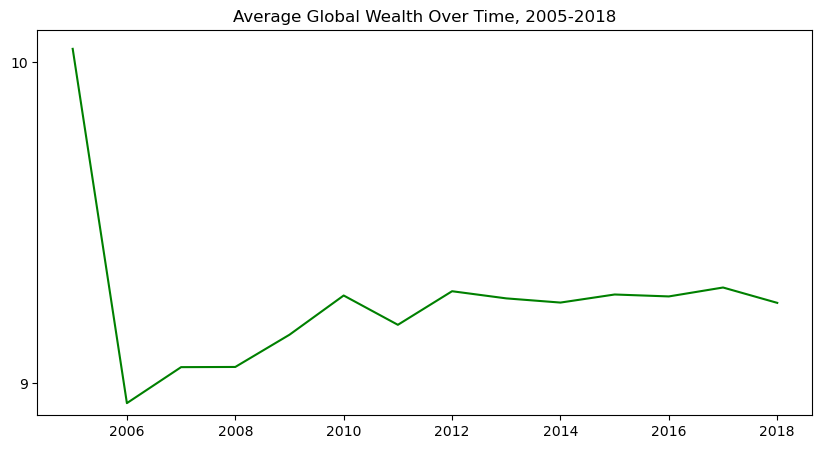

In [10]:
# Average global wealth over time
wealth_time_chart = by_year.wealth.plot(figsize=(10,5),ylim=(8.9,10.1),yticks=(9,10),
                                        title='Average Global Wealth Over Time, 2005-2018',
                                        xlabel='',color='green')

**What do you notice about the line graphs of happiness over time and wealth over time?**

Similar Trends in Happiness and Wealth: The similarity in the trends of the two plots suggests a potential correlation between global wealth and happiness. This implies that as average wealth increases or decreases, happiness levels might follow a similar pattern.

Decline in 2006: Both graphs show a noticeable decline in 2006. This could be indicative of a global event or economic condition that negatively impacted both wealth and happiness. Understanding the specific historical context of that year would be crucial to explain this trend.

Stability in Happiness Since 2008: After the decline in 2006 and some fluctuation, the average global happiness appears to have stabilized around the same level since 2008. This stability could suggest that factors other than wealth have become more influential in determining global happiness levels, or that happiness levels have reached a plateau where increases in wealth no longer correspond to significant increases in happiness.

Post-2006 Increase: Both happiness and wealth seem to show an increasing trend post-2006. This could indicate a recovery from the 2006 decline and a general improvement in global economic conditions and well-being. However, it's important to note that these are average values, and the experiences of individual countries may vary significantly.

These observations highlight the complex relationship between wealth and happiness at a global level. They suggest that while wealth may be a contributing factor to happiness, it is not the sole determinant, and other factors likely play significant roles in influencing overall well-being. This analysis could lead to further exploration of how different regions or countries have fared over time in terms of happiness and wealth, and what specific factors may have influenced these trends.

Answers will vary, but may include the following observations:

* The trends in the two plots look similar, which suggests there could be a correlation
* Both average global wealth and average global happiness have a noticeable decline in 2006
* Average global happiness has been about the same since 2008
* After 2006, both happiness and wealth seem to be increasing over time

## Explore Relationships with Scatter Plots

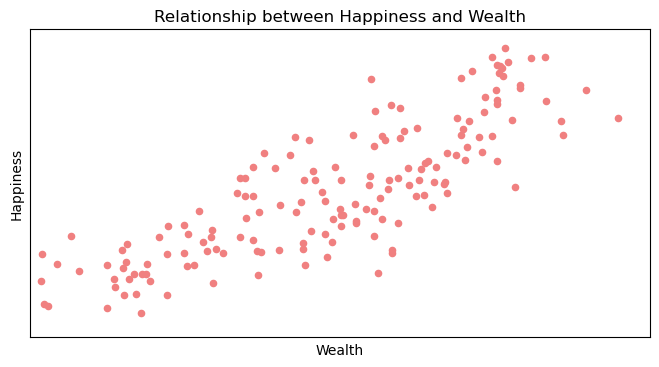

In [11]:
# Scatterplot of wealth and happiness
wealth_happiness = by_country.plot.scatter(x="wealth",y="happiness",title="Relationship between Happiness and Wealth", figsize=(8,4),
                                           xlabel="Wealth",ylabel="Happiness",color="lightcoral",
                                          xlim=(6.5,12),ylim=(3,8),xticks=(),yticks=())

**What do you notice about the relationship between happiness and wealth? How does this relate to what you learned about how happiness and wealth vary over time?**

Positive Correlation: There appears to be a positive correlation between wealth and happiness. As wealth (measured in terms of GDP per capita) increases, happiness levels also tend to increase. This suggests that wealthier countries generally report higher levels of happiness.
This observation aligns with the insights drawn from the previous line graphs showing global averages of happiness and wealth over time:

Parallel Trends: Both happiness and wealth demonstrated similar trends over the analyzed period, suggesting a correlation between these two factors. The increase in wealth over time was mirrored by an increase in happiness, and the decline around 2006 affected both metrics similarly.

Influence of Wealth on Happiness: The scatterplot further strengthens the idea that wealth is an influential factor in determining happiness. While it's not the sole determinant (as happiness levels seem to plateau even as wealth increases in some cases), it plays a significant role. Higher wealth typically means better access to healthcare, education, and other critical services, which can contribute to overall well-being.

Limitations of Wealth: However, the scatterplot also indicates that the relationship between happiness and wealth might not be linear, especially at higher levels of wealth. Beyond a certain point, increases in wealth might not correspond to equivalent increases in happiness. This aligns with the stabilization of happiness levels observed in the line graphs, suggesting that other factors become more influential in determining happiness at higher wealth levels.

In summary, the scatterplot provides further evidence of a relationship between happiness and wealth, supporting the trends observed in the global averages over time. However, it also hints at the complexity of this relationship and the potential for other factors to influence happiness, especially in wealthier nations.

Answers may vary, but should include the observation that happiness seems to increase as wealth increases. This suggests that there may be a relationship between happiness and wealth. This was also suggested by the previous charts, which showed that happiness and wealth had similar trends over time.

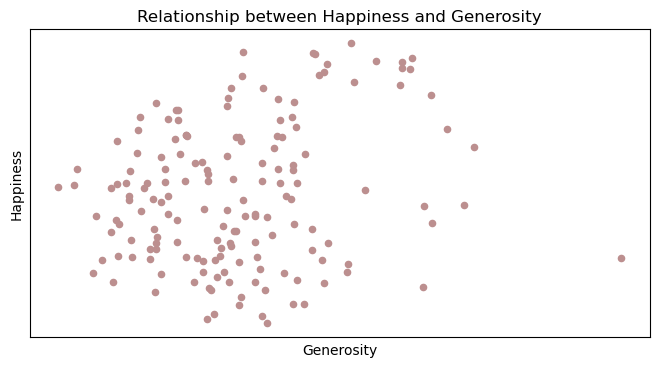

In [12]:
# Scatterplot of happiness and generosity
generosity_happiness = by_country.plot.scatter(x="generosity",y="happiness",title="Relationship between Happiness and Generosity", figsize=(8,4),
                                           xlabel="Generosity",ylabel="Happiness",color="rosybrown",
                                           xticks=(),yticks=())

**What do you notice about the relationship between happiness and generosity?**

The scatterplot comparing happiness and generosity across various countries reveals a particularly interesting observation:

Lack of Clear Pattern: Unlike the relationship between happiness and wealth, there does not seem to be a clear or strong pattern between happiness and generosity. The data points do not form a distinct trend line, indicating that the level of generosity in a country does not consistently predict its happiness rating.

Generosity Not Directly Correlated with High Happiness: Interestingly, the country with the highest level of generosity does not correspond to the highest happiness rating. This suggests that while generosity might be a positive quality within a society, it is not a dominant factor in determining the overall happiness of a country's population.

Moderate Generosity in Happiest Countries: The countries with the highest happiness ratings are observed to have only moderate levels of generosity. This indicates that while these countries might have other factors contributing to their high happiness levels (like wealth, social support, health, etc.), extreme levels of generosity are not a prerequisite for high happiness.

These insights suggest that the relationship between happiness and generosity is more complex and possibly influenced by other intervening variables. Generosity might contribute to a sense of community and well-being, but its impact on national happiness levels is not as straightforward or significant as factors like wealth or health. This analysis underscores the multifaceted nature of happiness and the importance of considering a range of social, economic, and cultural factors in understanding what contributes to the well-being of societies.

Answers will vary, but may include the observation that there is no clear pattern or relationship. Interestingly, the most generous country does not have a high happiness rating. The countries with the highest happiness rating are only moderately happy.

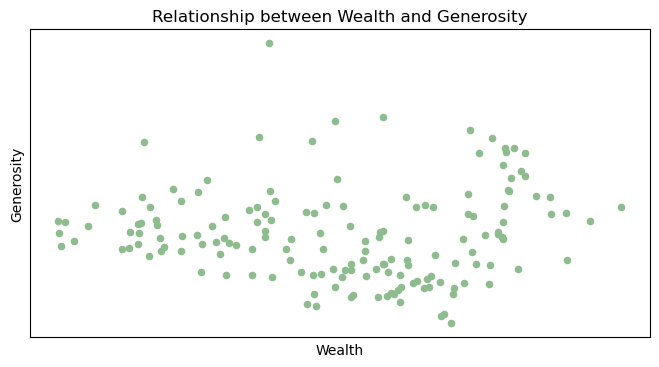

In [13]:
# Scatterplot of happiness and generosity
wealth_generosity = by_country.plot.scatter(x="wealth",y="generosity",title="Relationship between Wealth and Generosity", figsize=(8,4),
                                           xlabel="Wealth",ylabel="Generosity",color="darkseagreen",
                                           xticks=(),yticks=())

**What do you notice about the relationship between wealth and generosity?**

No Clear Relationship: Unlike some other factors like health or happiness, there does not appear to be a clear or consistent relationship between a country's wealth (as measured by GDP per capita) and its level of generosity. The data points are spread out across the plot without forming a distinct pattern or trend line.
This observation suggests that wealth, while a significant factor in aspects like happiness or health, does not straightforwardly translate to higher levels of generosity in a country's population. Generosity seems to be influenced by other factors that are not directly tied to economic wealth. Cultural norms, social structures, religious beliefs, and historical contexts are likely more influential in shaping the levels of generosity within different societies.

This analysis highlights the complexity of social behaviors like generosity, which are not solely driven by economic factors but are rather the result of a confluence of various societal influences.

Answers may vary, but should note that there is no clear relationship between wealth and generosity. 

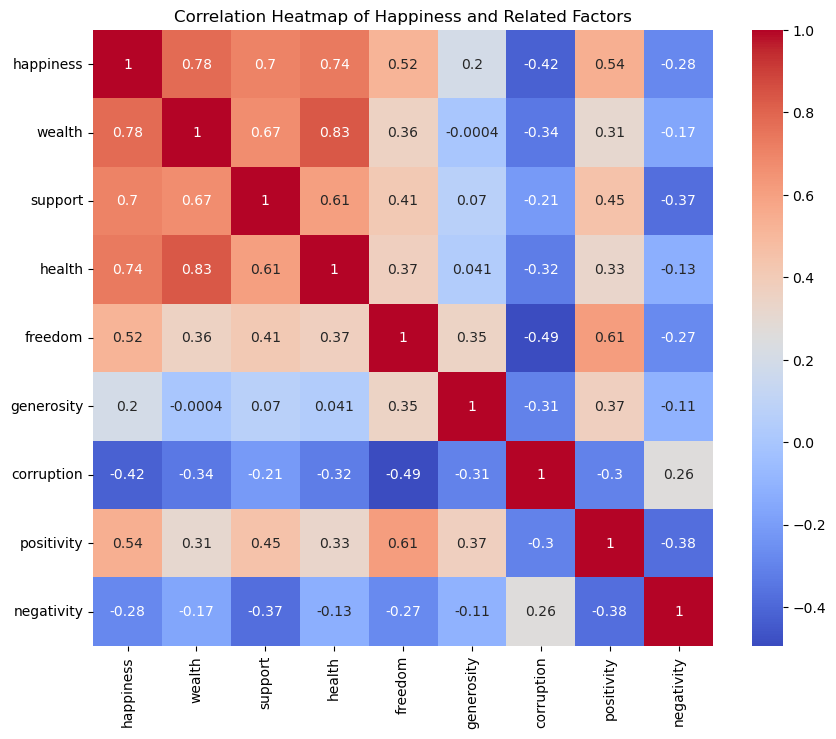

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns for correlation
relevant_columns = ['happiness', 'wealth', 'support', 'health', 'freedom', 'generosity', 'corruption', 'positivity', 'negativity']

# Calculating correlation matrix
correlation_matrix = happiness[relevant_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Happiness and Related Factors')
plt.show()


The correlation heatmap provides insights into how different factors are related to happiness and to each other:

Wealth (GDP per Capita) shows a strong positive correlation with happiness. This indicates that wealthier countries tend to have happier populations.
Health (Life Expectancy) is also positively correlated with happiness, suggesting that longer life expectancy contributes to higher happiness scores.
Social Support has a strong positive correlation with happiness, highlighting the importance of social bonds and community support in contributing to overall well-being.
Freedom to Make Life Choices is positively correlated with happiness. This suggests that countries where individuals have more freedom in their life choices tend to have happier populations.
Generosity shows a moderate positive correlation with happiness, though not as strong as other factors.
Perceptions of Corruption are negatively correlated with happiness, indicating that higher levels of perceived corruption are associated with lower happiness scores.
Positivity and Negativity (measures of positive and negative emotions, respectively) also show expected correlations with happiness.

In [16]:
# Group the dataset by country and calculate average values for all columns
by_country_avg = happiness.drop(columns=['year']).groupby('country').mean()

# Conducting the additional analyses:
# 1. Correlation between health (life expectancy) and happiness
health_happiness_corr = by_country_avg['health'].corr(by_country_avg['happiness'])

# 2. Impact of corruption perception on happiness
corruption_happiness_corr = by_country_avg['corruption'].corr(by_country_avg['happiness'])

health_happiness_corr, corruption_happiness_corr

(0.7925671323182217, -0.4339784783856991)

Health and Happiness Correlation: There is a strong positive correlation of approximately 0.79 between health (life expectancy) and happiness. This indicates a significant relationship where countries with higher life expectancy tend to have higher happiness ratings. This suggests that the health of a population is a crucial factor in determining its overall happiness.

Corruption Perception and Happiness Correlation: The correlation between perceptions of corruption and happiness is approximately -0.43. This negative correlation indicates that higher perceptions of corruption in a country are associated with lower happiness ratings. This underscores the importance of good governance and the negative impact of corruption on a society's well-being.

/Users/juanlavierigoiri/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


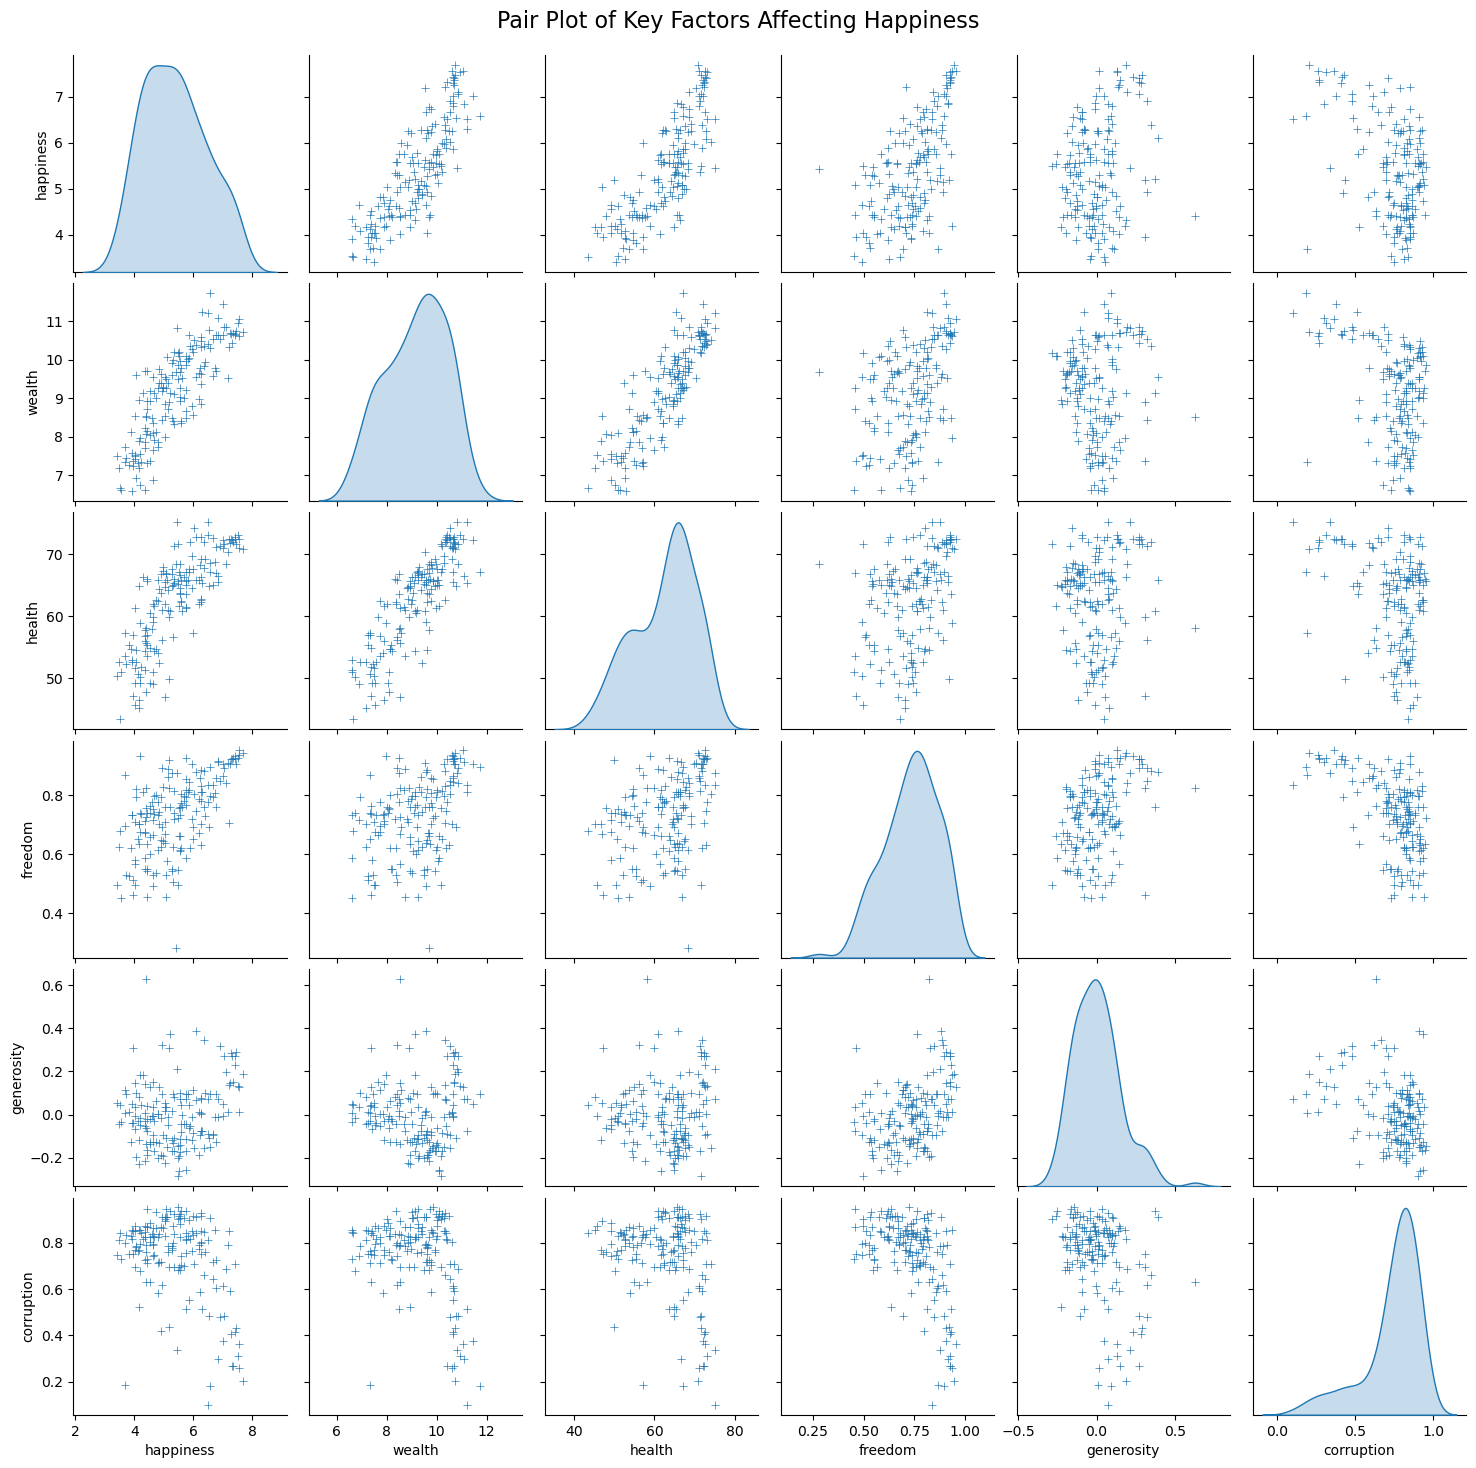

In [18]:
import matplotlib.pyplot as plt

columns_for_pairplot = ['happiness', 'wealth', 'health', 'freedom', 'generosity', 'corruption']


# Creating the pair plot
sns.pairplot(by_country_avg[columns_for_pairplot], kind="scatter", diag_kind="kde", markers="+")
plt.suptitle("Pair Plot of Key Factors Affecting Happiness", size=16)
plt.subplots_adjust(top=0.95)  # Adjusting the title position
plt.show()


Key observations from this visualization include:

Happiness and Wealth: There seems to be a positive correlation, indicating that higher wealth often corresponds with higher happiness.

Happiness and Health: Similar to wealth, there's a positive correlation with health, suggesting that better health outcomes are associated with higher happiness levels.

Happiness and Freedom: This also shows a positive trend, highlighting the importance of freedom in influencing happiness.

Generosity and Other Factors: The relationship between generosity and other factors like happiness, wealth, and health is less clear, suggesting that generosity is influenced by a complex set of factors and doesn't have a straightforward correlation with happiness.

Corruption and Happiness: A negative trend can be observed, where higher perceptions of corruption are associated with lower happiness levels.